In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

- 2 дискретных распределения: Negative Binomial (nbinom) и Poisson (poisson).
- 2 непрерывных: Gamma и Weibull (dweibull).

In [ ]:
distributions = {
    'Negative Binomial (дискретное)': stats.nbinom(n=5, p=0.5),  # Успехов до n неудач, p=вероятность успеха
    'Poisson (дискретное)': stats.poisson(mu=3),                 # Число событий, mu=среднее
    'Gamma (непрерывное)': stats.gamma(a=2, scale=2),            # Форма a=2, scale=2
    'Double Weibull (непрерывное)': stats.dweibull(c=1.2)                 # dweibull c=1.5
}

In [ ]:
def analyze_distribution(name, dist, is_discrete, max_n=1000, num_repeats=100):
    print(f"\nАнализ распределения: {name}")

    # Истинные параметры
    true_mean = dist.mean()
    true_std = dist.std()
    print(f"Истинное среднее: {true_mean:.3f}, Истинное СКО: {true_std:.3f}")

    # График распределения
    sample = dist.rvs(size=10000)
    if is_discrete:
        plt.hist(sample, bins=50, density=True)
        plt.title(f'Гистограмма распределения {name}')
        plt.legend()
    else:
        plt.hist(sample, bins=50, density=True)
        plt.title(f'Распределения {name}')
        plt.legend()
    plt.show()

    #  Функция распределения
    plt.hist(sample, bins=50, density=True, cumulative=True)
    plt.title(f'Функция распределения {name}')
    plt.legend()
    plt.show()

    # Анализ ошибки среднего и СКО в зависимости от N
    ns = [1000,10000,100000,1000000]
    error_means = []
    error_stds = []

    for n in ns:
        mean_diffs = []
        std_diffs = []
        for _ in range(num_repeats):
            sample = dist.rvs(size=n)
            sample_mean = np.mean(sample)
            sample_std = np.std(sample, ddof=1)
            mean_diffs.append(abs(sample_mean - true_mean))
            std_diffs.append(abs(sample_std - true_std))
        error_means.append(np.mean(mean_diffs))
        error_stds.append(np.mean(std_diffs))

    # График ошибок
    plt.plot(ns, error_means, label='Ошибка среднего')
    plt.plot(ns, error_stds, label='Ошибка СКО')
    plt.xscale('log')
    plt.title(f'Зависимость ошибки среднего и СКО от размера выборки N ({name})')
    plt.legend()
    plt.show()

## Анализ распределения: Negative Binomial (дискретное)


Анализ распределения: Negative Binomial (дискретное)
Истинное среднее: 5.000, Истинное СКО: 3.162


/tmp/ipython-input-3653891476.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


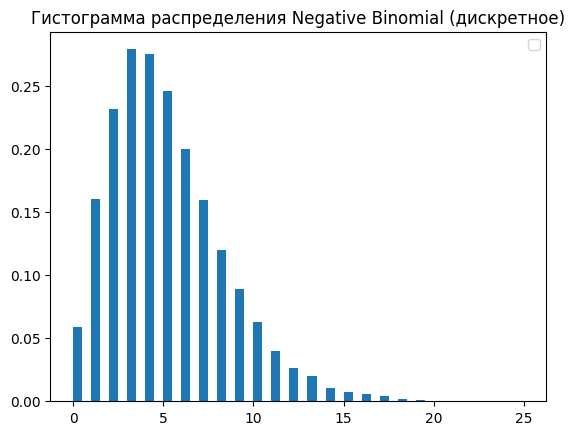

/tmp/ipython-input-3653891476.py:24: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


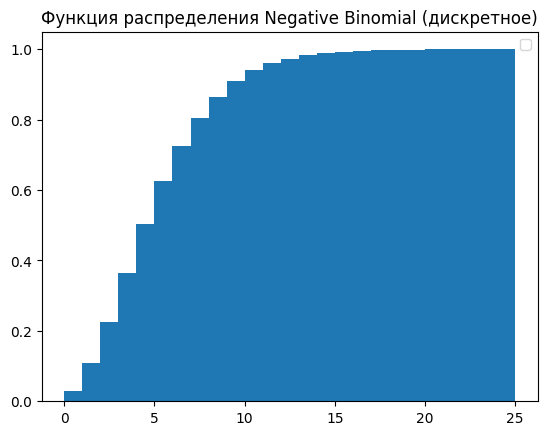

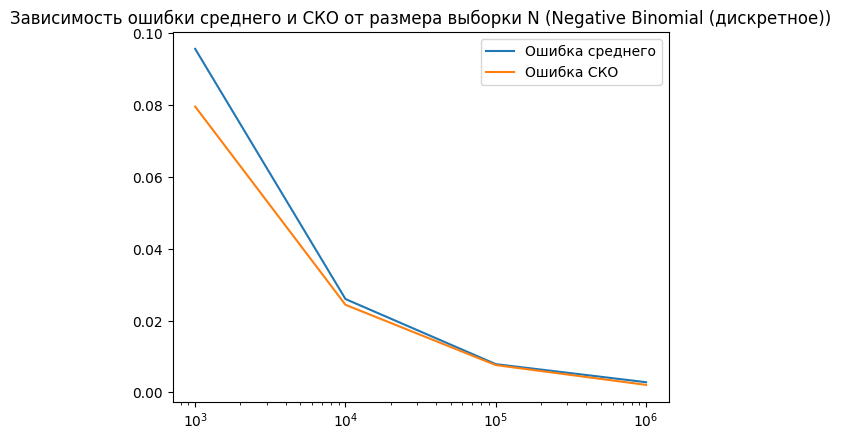

In [ ]:
name = 'Negative Binomial (дискретное)'
dist = distributions[name]
is_discrete = True
analyze_distribution(name, dist, is_discrete)

В распределении Negative Binomial при увеличении объема выборки ошибка определения среднего и ошибка среднеквадратичного отклонения уменьшаются. Разница между ними небольшая. Для малых N ошибки заметно выше, но при росте выборки N ошибки сокращаются

## Анализ распределения: Poisson (дискретное)


Анализ распределения: Poisson (дискретное)
Истинное среднее: 3.000, Истинное СКО: 1.732


/tmp/ipython-input-4164045767.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


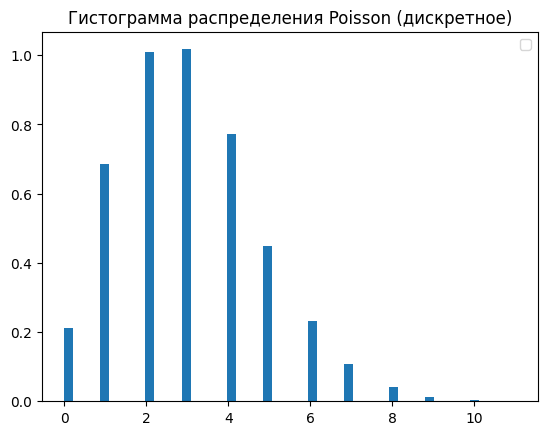

/tmp/ipython-input-4164045767.py:24: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


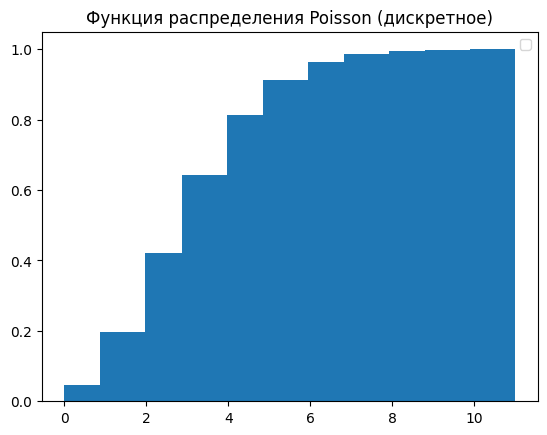

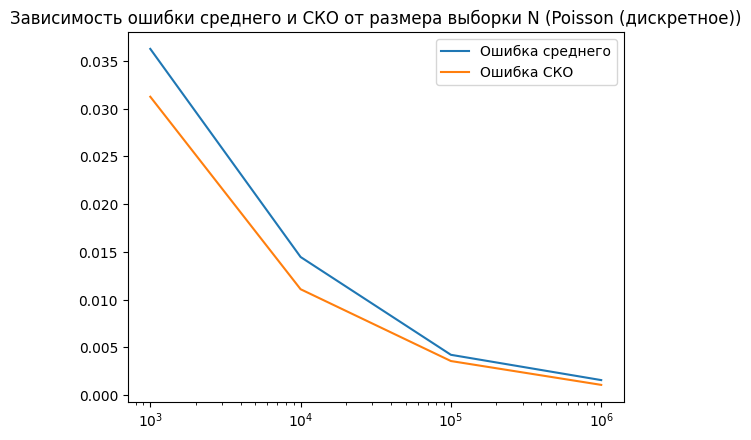

In [ ]:
name = 'Poisson (дискретное)'
dist = distributions[name]
is_discrete = True
analyze_distribution(name, dist, is_discrete)

В распределении Poisson при увеличении выборки ошибка определения среднего и ошибка среднеквадратичного отклонения существенно уменьшаются. Для малых N разница более заметна, но при увеличении объема выборки они быстро сокращаются

## Анализ распределения: Gamma (непрерывное)


Анализ распределения: Gamma (непрерывное)
Истинное среднее: 4.000, Истинное СКО: 2.828


/tmp/ipython-input-4164045767.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


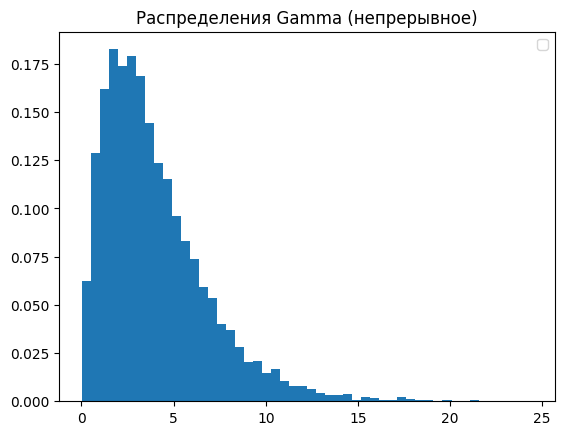

/tmp/ipython-input-4164045767.py:24: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


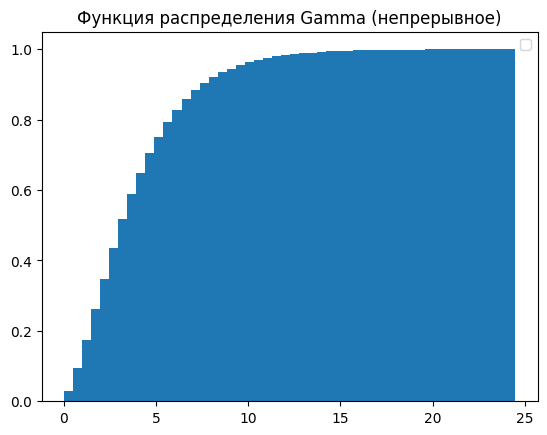

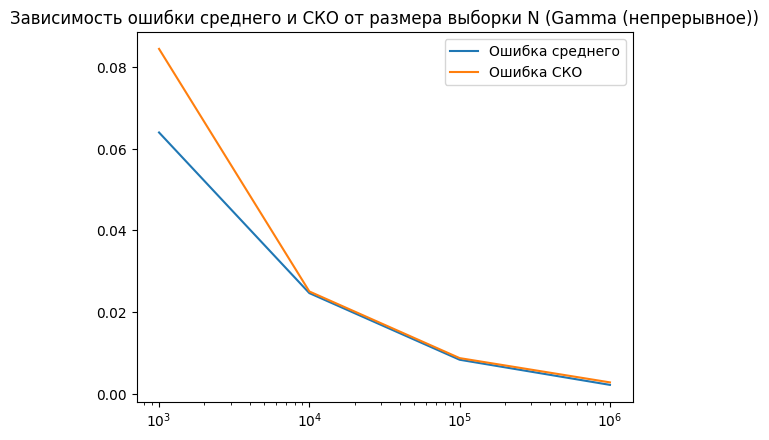

In [ ]:
name = 'Gamma (непрерывное)'
dist = distributions[name]
is_discrete = False
analyze_distribution(name, dist, is_discrete)

В гамма-распределении при увеличении размера выборки ошибка определения среднего и ошибка стандартного отклонения сильно уменьшаются. На малых выборках разницы практически нет

## Анализ распределения: Double Weibull (непрерывное)


Анализ распределения: Double Weibull (непрерывное)
Истинное среднее: 0.000, Истинное СКО: 1.227


/tmp/ipython-input-4164045767.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


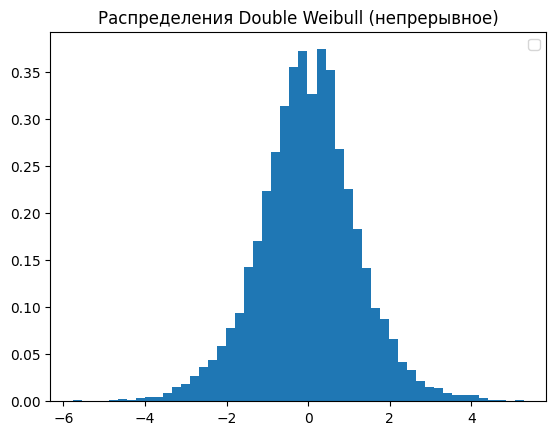

/tmp/ipython-input-4164045767.py:24: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


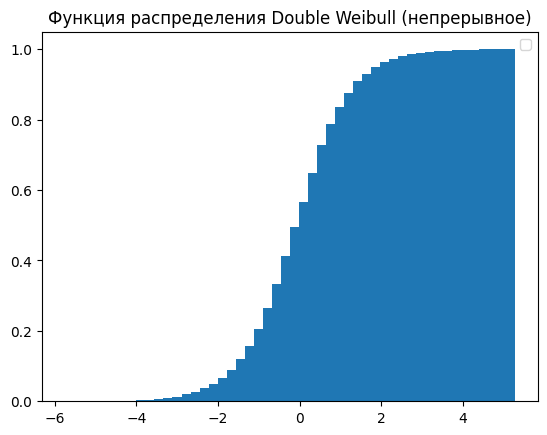

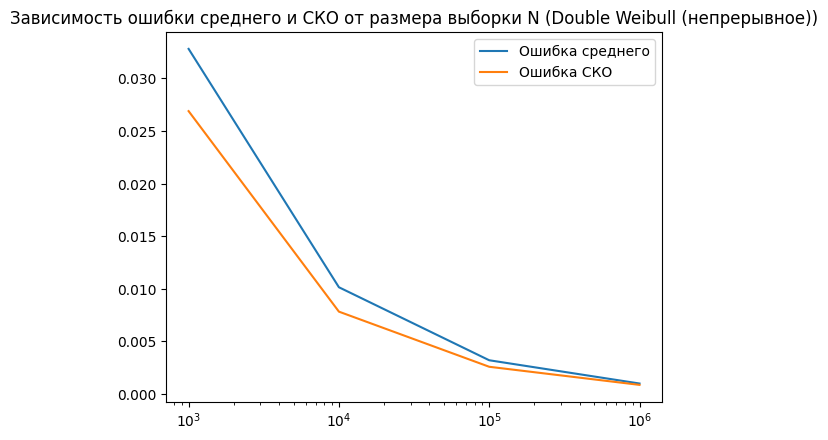

In [ ]:
name = 'Double Weibull (непрерывное)'
dist = distributions[name]
is_discrete = False
analyze_distribution(name, dist, is_discrete)

Для double Weibull распределения при увеличении размера выборки ошибка определения среднего и ошибка среднеквадратичного отклонения уменьшаются. Разницы между ошибками практически нет

In [ ]:
print("\nВыводы:")
print("Для всех распределений (дискретных и непрерывных) ошибки оценки среднего и СКО уменьшаются с ростом N, подтверждая центральную предельную теорему")
print("Дискретные распределения (Negative Binomial, Poisson) имеют более сильную разницу между ошибкой среднего и ошибкой СКО")
print("На малых N ошибки выше для распределений с большой дисперсией (например, Poisson); ЦПТ работает лучше на N>30.")


Выводы:
Для всех распределений (дискретных и непрерывных) ошибки оценки среднего и СКО уменьшаются с ростом N, подтверждая центральную предельную теорему
Дискретные распределения (Negative Binomial, Poisson) имеют более сильную разницу между ошибкой среднего и ошибкой СКО
На малых N ошибки выше для распределений с большой дисперсией (например, Poisson); ЦПТ работает лучше на N>30.
